<a href="https://colab.research.google.com/github/EhigieO/AI-DA/blob/main/customer_play_around.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "/content/drive/MyDrive/UniBradStudy/Customers.csv"


df = pd.read_csv(path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df["Gender"].unique()

df["Gender"] = (df["Gender"] == "Male").astype(int)

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,Healthcare,1,4
1,2,1,21,35000,81,Engineer,3,3
2,3,0,20,86000,6,Engineer,1,1
3,4,0,23,59000,77,Lawyer,0,2
4,5,0,31,38000,40,Entertainment,2,6


In [ ]:
df.Gender.value_counts()

0    1186
1     814
Name: Gender, dtype: int64

In [ ]:
df1 = df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

engineers = df1['Profession'].loc[df1['Profession'].str.contains('Engineer')]

print(engineers)

1       Engineer
2       Engineer
8       Engineer
10      Engineer
44      Engineer
          ...   
1959    Engineer
1961    Engineer
1972    Engineer
1976    Engineer
1994    Engineer
Name: Profession, Length: 179, dtype: object


In [ ]:
print(f'Check for missings')
for c in df1.columns:
  count = df1[c].isnull().sum()
  print(f'Col {c} has {count} missing values')
  print(f'Done checking for missings')


Check for missings
Col CustomerID has 0 missing values
Done checking for missings
Col Gender has 0 missing values
Done checking for missings
Col Age has 0 missing values
Done checking for missings
Col Annual Income ($) has 0 missing values
Done checking for missings
Col Spending Score (1-100) has 0 missing values
Done checking for missings
Col Profession has 0 missing values
Done checking for missings
Col Work Experience has 0 missing values
Done checking for missings
Col Family Size has 0 missing values
Done checking for missings


Text(0.5, 1.0, 'Profession with the highest purchasing power')

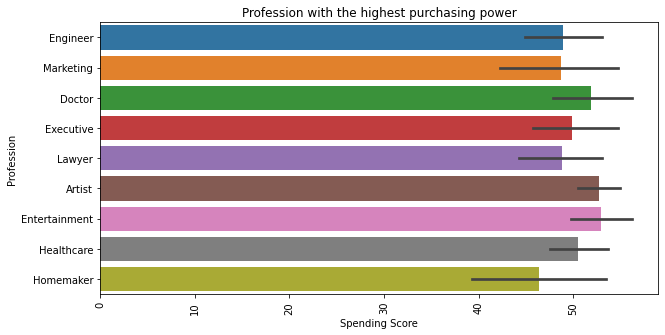

In [ ]:
import seaborn as sns

highest_purchasing_profession = df1[['Spending Score (1-100)','Profession']].sort_values(by='Spending Score (1-100)', ascending=False)

highest_purchasing_profession.sort_values(by='Spending Score (1-100)',ascending=True, inplace=True)

plt.figure(figsize=(10,5))
ax=sns.barplot(
    y=highest_purchasing_profession['Profession'],
    x=highest_purchasing_profession['Spending Score (1-100)']
)
plt.xticks(rotation= 90)
plt.ylabel('Profession')
plt.xlabel('Spending Score')
plt.title('Profession with the highest purchasing power')

Text(0.5, 1.0, 'Highest Paid By Age')

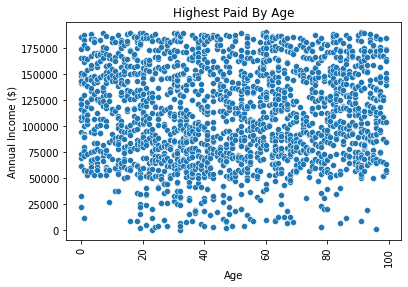

In [ ]:
highest_paid_age = df1[['Age','Annual Income ($)']].sort_values(by='Age', ascending=False)
highest_paid_age.sort_values(by='Age',ascending=True, inplace=True)

# sns.scatterplot(x='X', y='Y', data=df)

# plt.figure(figsize=(10,5))
ax=sns.scatterplot(
    x=highest_paid_age['Age'],
    y=highest_paid_age['Annual Income ($)']
)
plt.xticks(rotation= 90)
plt.ylabel('Annual Income ($)')
plt.xlabel('Age')
plt.title('Highest Paid By Age')

In [ ]:
# df = pd.get_dummies(df, drop_first=True)

# X = df.drop(['Age'], axis=1)
# y = df['Age']

# df.head()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)
# print('Test R2 score:', r2_score(y_test, y_pred))
# print('Test MSE score:', mean_squared_error(y_test, y_pred))